## Gráficos utilizando GWChemPlots
Gráficos de aguas subterráneas

Los datos entran por fichero. Sobre el contenido ver example_data_template.ipynb.

Si tienes datos de CHS puedes utilizar lo puedes crear con GWChem_data.ipynb


In [1]:
# Mientras escribo pued cambiar algo en AquaChem.py
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd

import sys
path = r'C:\Users\solis\Documents\DEV\python3\CalidadAgua\GWChem'
if path not in sys.path:
    sys.path.append(path)
import GWChemPlots as gwchem

## Leo el fichero de datos


In [39]:
fpath = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\chs_sc_AquaChemPlots_data.csv'

data = pd.read_csv(fpath)

data[0:5]


,Sample,Label,Color,Marker,Size,Alpha,PH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,CBE
0,CA0708002-1981-10-06,CA0708002,b,o,30,0.6,8.0,96.2,75.4,267.2,12.6,268.5,0.0,404.1,315.9,45.295968,1.333300
1,CA0708002-1995-03-01,CA0708002,b,o,30,0.6,7.8,82.0,47.0,286.0,10.0,257.0,0.0,384.0,233.0,40.540435,1.901321
2,CA0708002-1995-09-13,CA0708002,b,o,30,0.6,7.8,60.0,58.0,382.0,20.0,88.0,0.0,620.0,361.0,51.335867,-3.013386
3,CA0708002-1996-06-05,CA0708002,b,o,30,0.6,7.9,72.0,55.0,289.0,9.0,236.0,0.0,428.0,233.0,41.696846,0.342411
4,CA0708002-1996-11-03,CA0708002,b,o,30,0.6,8.7,39.0,36.0,270.0,10.0,85.0,0.0,400.0,250.0,34.789220,-2.793576


## Gráfico de Piper

In [40]:
fo_triangle_piper = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\graphs\sc_piper.png'

gwchem.triangle_piper(data, fo_triangle_piper)

Se ha grabado: E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\graphs\sc_piper.png


Iones dominantes

In [42]:
iones_dominantes = data.copy()
gwchem.cbe(iones_dominantes)
iones_dominantes['cation_dominant'] = iones_dominantes.apply(gwchem.cation_dominant, axis=1)
iones_dominantes['anion_dominant'] = iones_dominantes.apply(gwchem.anion_dominant, axis=1)

unique_values = (iones_dominantes['anion_dominant']  + '; ' + iones_dominantes['cation_dominant']).value_counts()
unique_values

NO3 is not present


Cl (SO4-HCO3); Na (Mg-Ca)    30
Cl (HCO3-SO4); Na (Mg-Ca)     2
SO4 (HCO3-Cl); Ca (Mg-Na)     1
Name: count, dtype: int64

In [43]:
iones_dominantes[(iones_dominantes['anion_dominant'] == 'SO4 (HCO3-Cl)') & (iones_dominantes['cation_dominant'] == 'Ca (Mg-Na)')]

,Sample,Label,Color,Marker,Size,Alpha,PH,Ca,Mg,Na,...,rHCO3,rCa,rMg,rK,rNa,sum_anions,sum_cations,cbe,cation_dominant,anion_dominant
30,CA0708002-2020-11-26,CA0708002,b,o,30,0.6,7.61,219.0,93.0,38.0,...,4.080843,10.928689,7.652746,0.061384,1.652909,20.525219,20.295728,-0.562188,Ca (Mg-Na),SO4 (HCO3-Cl)


In [44]:
data[(data['Sample'] == 'CA0708002-2020-11-26')]

,Sample,Label,Color,Marker,Size,Alpha,PH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,CBE
30,CA0708002-2020-11-26,CA0708002,b,o,30,0.6,7.61,219.0,93.0,38.0,2.4,249.0,0.0,72.0,692.3,40.800771,-0.513018


In [ ]:
data

## Stiff

In [74]:
dir_out = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\graphs'
data[-3:]


,Sample,Label,Color,Marker,Size,Alpha,PH,Ca,Mg,Na,K,HCO3,CO3,Cl,SO4,TDS,CBE
30,CA0708002-2020-11-26,CA0708002,b,o,30,0.6,7.61,219.0,93.0,38.0,2.4,249.0,0.0,72.0,692.3,40.800771,-0.513018
31,CA0708002-2021-06-08,CA0708002,b,o,30,0.6,7.80,89.0,53.0,314.0,10.0,254.0,0.0,437.0,229.0,43.954520,3.364101
32,CA0708002-2022-05-23,CA0708002,b,o,30,0.6,8.23,72.0,48.0,270.0,10.0,220.0,0.0,400.0,229.3,39.189512,-0.264551


In [ ]:
achem.stiff(data, dir_out)

In [82]:
file_path = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\graphs\sc_schoeller.png'
achem.schoeller(data, file_path)

Se ha grabado: E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\graphs\sc_schoeller.png


## Gráficos xy normales

In [52]:
path = r'E:\LSGB\20231117_JCUNVRS\scripts'
if path not in sys.path:
    sys.path.append(path)
import my_plots as myplt

In [48]:
fpath = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\chs_sc_mayor.csv'

scdata = pd.read_csv(fpath)
scdata.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           38 non-null     object 
 1   Fecha        38 non-null     object 
 2   HCO3         37 non-null     float64
 3   Ca           37 non-null     float64
 4   Cl           38 non-null     float64
 5   Cond20situ   22 non-null     float64
 6   K            35 non-null     float64
 7   Mg           37 non-null     float64
 8   Na           37 non-null     float64
 9   NO3          38 non-null     float64
 10  PH           38 non-null     float64
 11  SO4          37 non-null     float64
 12  CO3          38 non-null     float64
 13  rCl          38 non-null     float64
 14  rSO4         37 non-null     float64
 15  rCO3         38 non-null     float64
 16  rHCO3        37 non-null     float64
 17  rNO3         38 non-null     float64
 18  rCa          37 non-null     float64
 19  rMg       

In [49]:
scdata[0:5]

,Id,Fecha,HCO3,Ca,Cl,Cond20situ,K,Mg,Na,NO3,...,rCO3,rHCO3,rNO3,rCa,rMg,rK,rNa,sum_anions,sum_cations,cbe
0,CA0708002,1981-10-06,268.5,96.2,404.1,NaN,12.6,75.4,267.2,6.3,...,0.0,4.400427,0.101605,4.800639,6.204485,0.322265,11.622561,22.346019,22.949950,1.333300
1,CA0708002,1992-05-29,278.0,42.0,468.0,NaN,NaN,72.0,382.0,11.0,...,0.0,4.556122,0.177405,2.095913,5.924707,NaN,16.616087,24.700525,NaN,NaN
2,CA0708002,1992-09-10,288.0,67.0,532.0,NaN,NaN,48.0,513.0,1.0,...,0.0,4.720012,0.016128,3.343480,3.949804,NaN,22.314274,25.987850,NaN,NaN
3,CA0708002,1995-03-01,257.0,82.0,384.0,NaN,10.0,47.0,286.0,2.0,...,0.0,4.211955,0.032256,4.092021,3.867517,0.255766,12.440316,19.884816,20.655619,1.901321
4,CA0708002,1995-09-13,88.0,60.0,620.0,NaN,20.0,58.0,382.0,1.0,...,0.0,1.442226,0.016128,2.994161,4.772680,0.511531,16.616087,26.441408,24.894460,-3.013386


In [51]:
scdata["Fecha"] = pd.to_datetime(scdata["Fecha"], format='%Y-%m-%d')

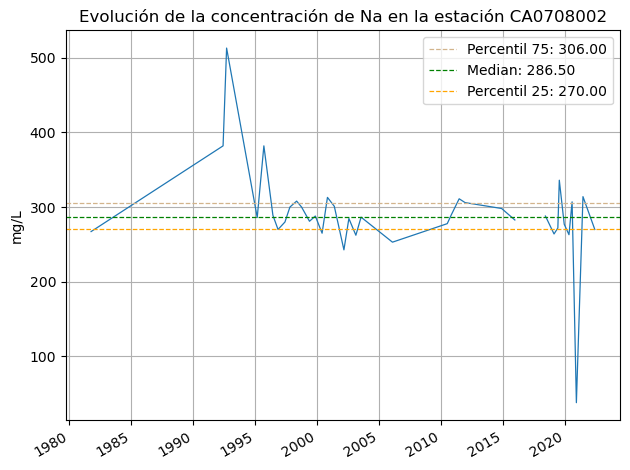

E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\xy\Na_mgL.png


In [60]:
# evolución del sodio
x_col_name = 'Fecha'
y_col_name = 'Na'

x = scdata[x_col_name]
y = scdata[y_col_name]
ylabel = 'mg/L'
title = 'Evolución de la concentración de Na en la estación CA0708002'
file_path = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\xy\Na_mgL.png'

median = scdata[y_col_name].median()
perc_25 = scdata[y_col_name].quantile(0.25)
perc_75 = scdata[y_col_name].quantile(0.75)

hline = {'value': median, 'color': 'g', 'linestyle': '--', 'label': f'Median: {median:0.2f}'}
hline25 = {'value': perc_25, 'color': 'orange', 'linestyle': '--', 'label': f'Percentil 25: {perc_25:0.2f}'}
hline75 = {'value': perc_75, 'color': 'tan', 'linestyle': '--', 'label': f'Percentil 75: {perc_75:0.2f}'}

hlines = [hline75, hline, hline25]

myplt.plot_time_series([x], [y], ylabel, title, file_path=file_path, hlines = hlines) 


In [ ]:
# Relaciones inicas Cl / So4
x_col_name = 'Fecha'
y_col_name = 'Na'

x = scdata[x_col_name]
y = scdata[y_col_name]
ylabel = 'mg/L'
title = 'Evolución de la concentración de Na en la estación CA0708002'
file_path = r'E:\LSGB\20231117_JCUNVRS\calidad_quim_sub\xy\Na_mgL.png'

median = scdata[y_col_name].median()
perc_25 = scdata[y_col_name].quantile(0.25)
perc_75 = scdata[y_col_name].quantile(0.75)

hline = {'value': median, 'color': 'g', 'linestyle': '--', 'label': f'Median: {median:0.2f}'}
hline25 = {'value': perc_25, 'color': 'orange', 'linestyle': '--', 'label': f'Percentil 25: {perc_25:0.2f}'}
hline75 = {'value': perc_75, 'color': 'tan', 'linestyle': '--', 'label': f'Percentil 75: {perc_75:0.2f}'}

hlines = [hline75, hline, hline25]

myplt.plot_time_series([x], [y], ylabel, title, file_path=file_path, hlines = hlines) 
